In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline
# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [74]:
credit=pd.read_csv(r"C:\Users\vijay\Downloads\creditcard.csv")

In [75]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [77]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [78]:
credit.shape

(284807, 31)

In [79]:
credit.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5003,4571.0,0.925393,-0.082930,0.409920,1.701048,-0.205809,-0.097494,0.139576,-0.127342,1.568456,-0.552114,0.406064,-1.996340,1.482823,1.538617,-0.811325,-0.734454,1.003196,-0.674322,-0.611272,0.018077,-0.176740,-0.311427,-0.160618,0.026246,0.591976,-0.364049,-0.010755,0.031229,133.73,0
132933,80180.0,0.443034,-1.371677,-0.899204,0.065502,-0.183085,-0.161898,0.793678,-0.204797,-0.274162,-0.175962,0.480065,0.493610,0.041364,0.693257,0.314911,0.723990,-0.853043,-0.015828,0.862598,0.908015,-0.189954,-1.695088,-0.354511,-0.798552,0.049511,0.628113,-0.195306,0.062188,471.43,0
95123,65181.0,1.114912,0.174899,0.267546,1.038200,-0.251839,-0.624361,0.178029,-0.100291,-0.289017,0.161647,1.311790,0.902176,-0.033731,0.586847,0.219986,0.249681,-0.678790,0.347900,-0.095029,-0.038541,0.106757,0.218774,-0.151777,0.345320,0.642859,-0.350661,0.001735,0.018075,49.24,0
77874,57255.0,-1.435136,-0.131895,2.231532,1.417463,-0.044422,-0.330080,0.097144,0.287545,-0.317131,-0.123553,-0.154568,-0.597070,-1.003899,0.354707,2.016607,-0.377501,0.265049,0.134975,0.037956,0.609727,0.302643,0.548036,0.198994,0.370258,0.283079,-0.093460,0.292175,0.173672,133.00,0
33188,37123.0,-0.753527,0.888498,0.719021,1.499178,-0.249898,0.145341,0.123542,0.573558,-0.049118,-1.364723,-0.489045,0.583607,0.598975,-1.693116,-0.230681,-0.474487,1.821317,0.176720,0.168959,0.108677,0.168275,0.590601,0.144645,-0.001873,-0.593882,-0.316766,0.153244,0.160496,85.15,0
141118,84132.0,1.255338,0.297746,0.289835,0.701212,-0.441173,-1.091734,0.034491,-0.159910,0.149718,-0.260015,-0.198006,-0.176820,-0.548506,-0.133330,1.178926,0.514826,0.039057,-0.204199,-0.193311,-0.129985,-0.296380,-0.893411,0.138500,0.324177,0.189797,0.096977,-0.028172,0.029195,1.98,0
72818,54870.0,1.196737,-0.388648,0.312932,-0.717073,-0.803724,-0.686893,-0.232986,-0.006719,1.472948,-0.932750,0.985078,1.282063,-0.786810,0.236240,-0.401154,-0.927745,0.046367,0.315504,1.207723,-0.134701,0.009176,0.285085,-0.186464,0.371754,0.805042,-0.577885,0.054795,0.010725,20.00,0
173676,121595.0,1.339749,-2.050351,-1.157441,-1.685687,-0.643761,0.801048,-0.442548,0.289203,3.090582,-1.778881,-0.668338,1.279078,-0.507570,-0.121143,0.891567,-2.138919,1.074466,-1.663403,0.429407,0.262518,-0.105688,-0.422000,0.097896,-1.379081,-0.475958,-1.065283,0.083692,0.002758,309.84,0
184525,126278.0,0.186212,0.556981,-1.138004,-0.495189,1.462731,-0.559763,1.472695,-0.278777,-0.513984,-0.358525,-0.271479,0.304500,-0.270278,0.756052,-1.032295,-0.557980,-0.672861,0.495357,1.089521,-0.001205,0.270195,0.816033,-0.252786,-0.995329,0.046375,-0.081233,0.066260,0.071650,56.58,0
93077,64240.0,-0.541541,-1.305945,3.334561,-1.327337,-1.649477,0.188797,-0.892089,-0.228015,-0.583904,1.051726,-1.102559,-0.315746,0.808641,-2.353908,-2.229507,-1.567392,1.194969,-0.205614,0.490821,-0.175272,-0.252017,0.537889,0.038239,0.756398,-0.150621,-0.172584,-0.206890,-0.325226,24.00,0


In [80]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [81]:
credit.isnull().values.any()

False

In [82]:
credit_dup=credit[credit.duplicated(keep='last')]
credit_dup

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282986,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283482,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283484,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [83]:
credit['V15'].value_counts()

V15
 1.124147    77
 1.275257    77
 0.271957    62
 1.446627    60
 0.583897    53
             ..
 0.369308     1
-0.720932     1
 1.259754     1
 0.946766     1
 0.041333     1
Name: count, Length: 275653, dtype: int64

In [84]:
credit['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [85]:
credit['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [86]:
credit[['Time','Class','Amount']].describe()

,Time,Class,Amount
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.001727,88.349619
std,47488.145955,0.041527,250.120109
min,0.000000,0.000000,0.000000
25%,54201.500000,0.000000,5.600000
50%,84692.000000,0.000000,22.000000
75%,139320.500000,0.000000,77.165000
max,172792.000000,1.000000,25691.160000


<Axes: xlabel='Class'>

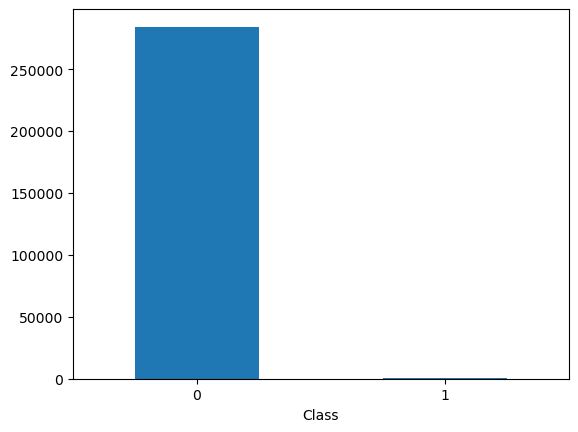

In [87]:
classes=pd.value_counts(credit['Class'])
classes.plot(kind='bar',rot=0)

<Axes: xlabel='Time', ylabel='Density'>

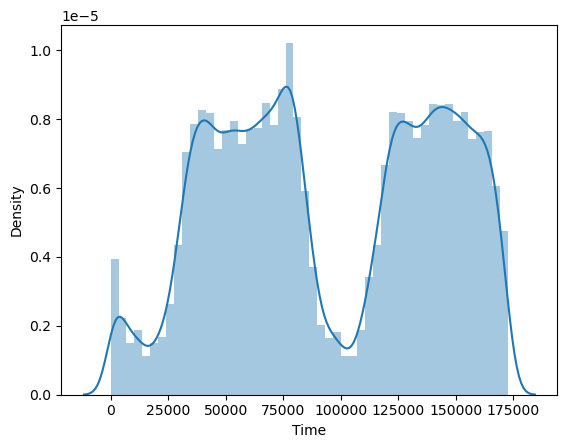

In [88]:
sns.distplot(credit['Time'])

In [89]:
fraud=credit[credit['Class']==1]
valid=credit[credit['Class']==0]
fraudper=(len(fraud)/len(valid))*100
print("Fraud Transactions: " ,len(fraud))
print("Valid Transactions: ",len(valid))
print("Fraud percentage: {}%" .format(round(fraudper, 3)))

Fraud Transactions:  492
Valid Transactions:  284315
Fraud percentage: 0.173%


In [90]:
print(fraud.shape)
print(valid.shape)

(492, 31)
(284315, 31)


In [91]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [92]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [93]:
#Mean of both transactions(valid / fraud)
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


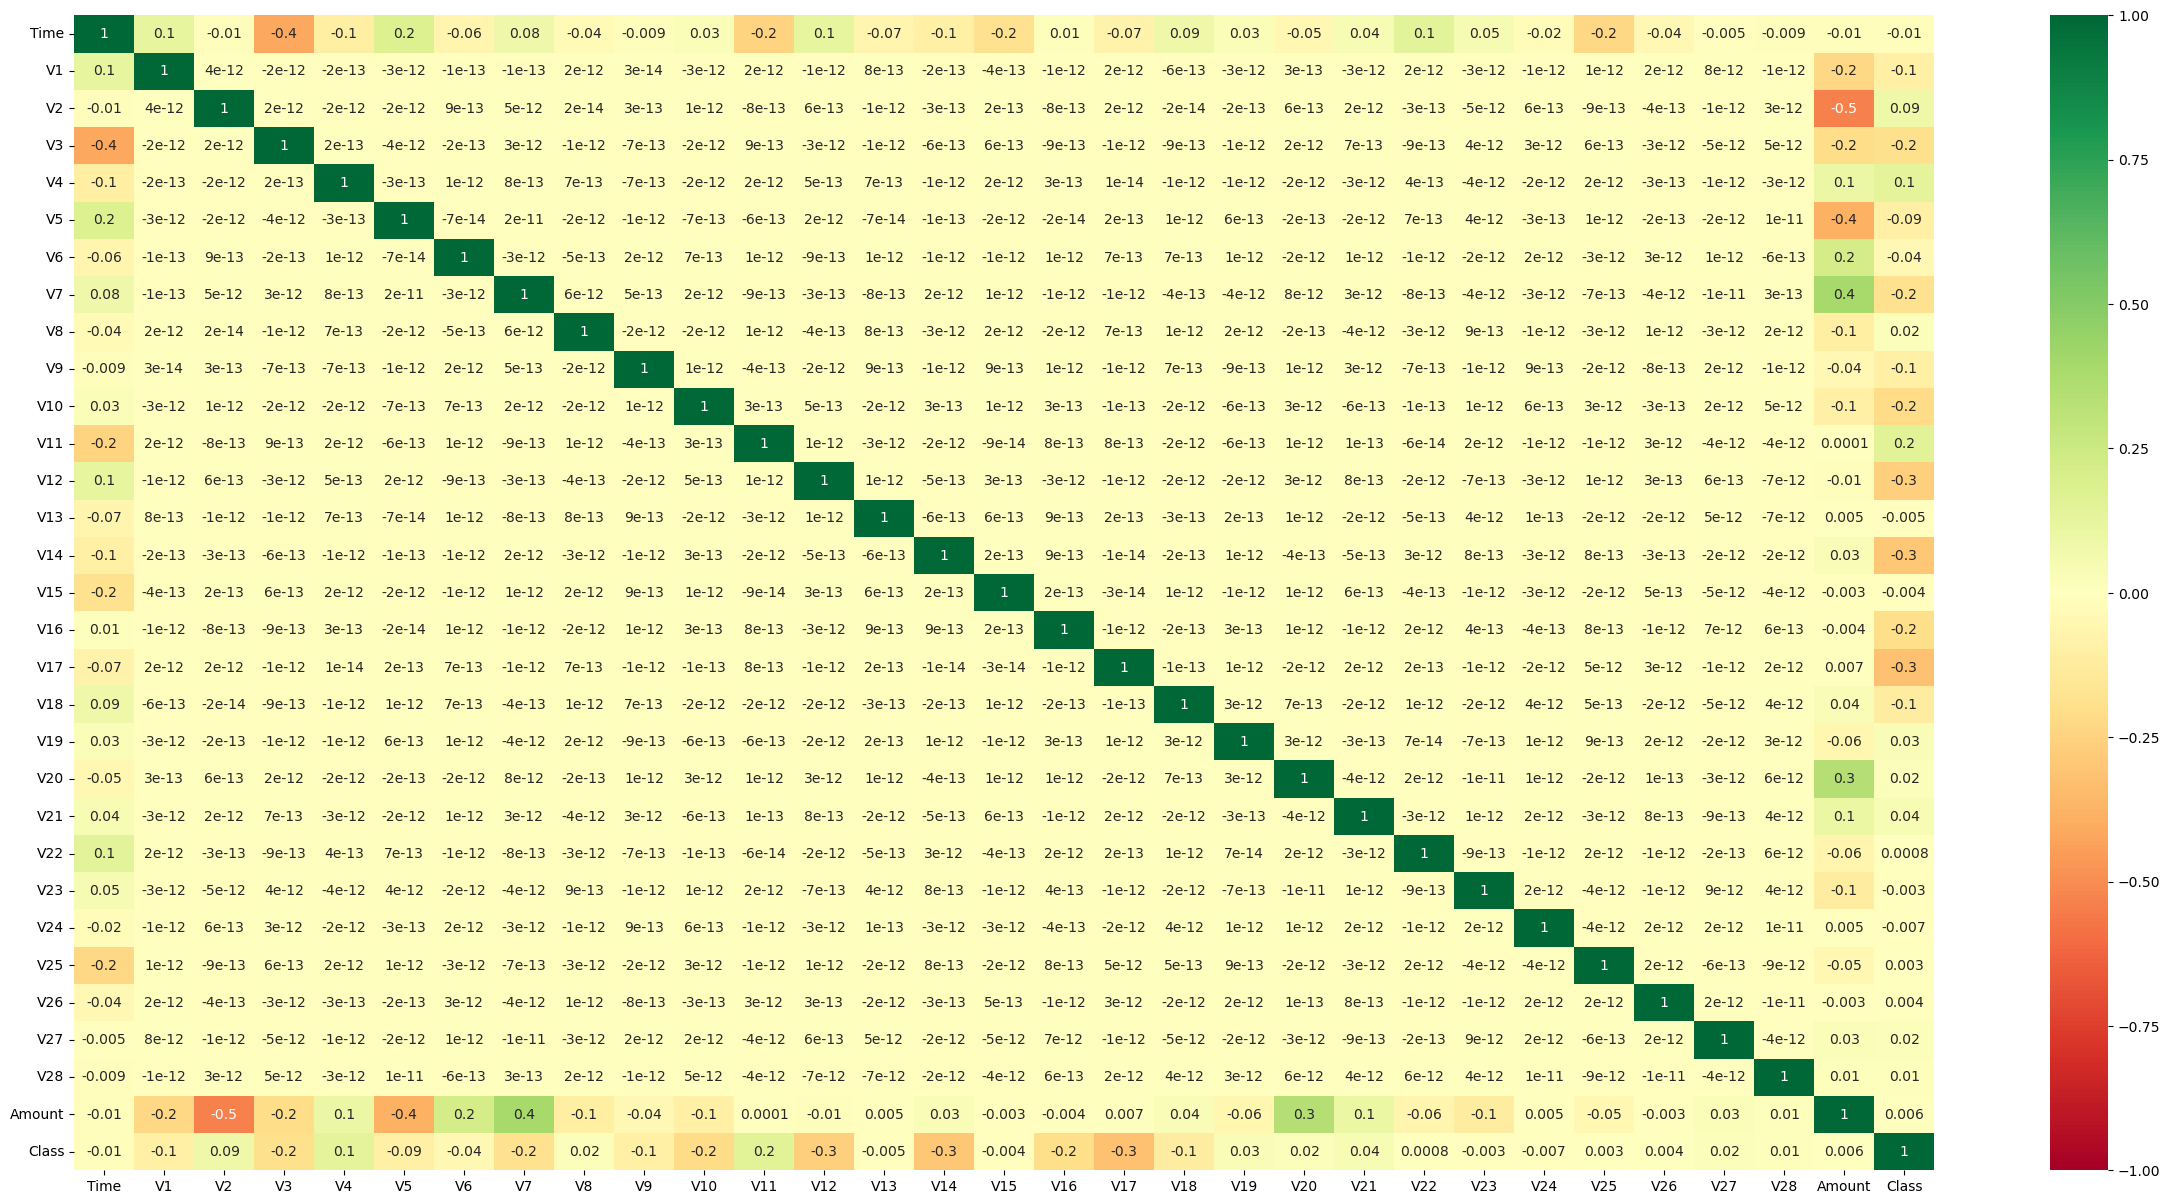

In [94]:
corr = credit.corr(method='pearson')
figure = plt.figure(figsize=(30,15))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="RdYlGn", center=0, annot=True, fmt='.1g')
plt.show()

# Under-Sampling

In [95]:
valid_sample = valid.sample(n=492)

In [96]:
#concatenating two dataframes[1.valid 2.fraud](axis=0 means rows)
new_dataset = pd.concat([valid_sample, fraud], axis=0)

In [97]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
230054,146168.0,0.696697,-2.528721,-1.560783,0.670196,-0.915490,0.078480,0.418448,-0.070636,0.658245,-0.092119,0.797896,0.630193,-0.653194,0.532303,-0.122926,0.434999,-0.551792,0.275719,-0.069442,1.143938,0.431156,-0.217874,-0.313661,0.756301,-0.589360,0.419640,-0.192286,0.055602,674.75,0
132115,79862.0,1.106096,0.180624,0.409068,0.738692,-0.467031,-1.263839,0.437068,-0.347607,-0.271327,-0.132612,0.278149,0.987084,1.051817,0.229493,0.751138,0.059227,-0.263999,-1.098903,-0.072862,0.091916,-0.424661,-1.392082,0.224663,0.697936,0.064024,-0.157926,-0.048844,0.036290,75.27,0
135940,81470.0,1.291036,-0.818181,-1.587687,-1.501697,1.573465,3.204697,-0.933964,0.779536,-0.770457,0.147069,0.086804,-0.762348,0.028209,-1.203317,0.255874,1.445078,0.810070,-0.794484,1.014024,0.375210,-0.085713,-0.552783,-0.116927,0.934030,0.607931,-0.294383,0.009585,0.045128,91.30,0
152477,97386.0,-0.457568,1.373937,-0.923840,-1.259851,1.784734,-0.754391,1.746768,-0.590443,1.019957,0.112436,1.692251,-1.645398,2.332887,1.768986,-1.585829,-0.525012,-0.260699,0.363497,0.043323,0.317797,0.011301,0.786871,-0.274908,0.363829,-0.175903,-0.002790,0.409338,0.189566,21.00,0
273786,165699.0,2.086593,-2.213160,0.779336,-0.971718,-2.675085,0.490341,-2.440463,0.296928,0.617228,1.160396,-2.081424,-0.383553,0.284111,-1.863734,-1.930430,-0.760567,0.939237,0.291934,0.171508,-0.383670,-0.059215,0.695180,0.150921,-0.075280,-0.352278,0.026687,0.111921,-0.022529,52.95,0


In [98]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [99]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,92032.969512,-0.081636,-0.125522,0.053988,-0.102987,0.115074,-0.111737,-0.081076,0.029257,0.049550,0.109576,0.097937,0.010549,0.044978,0.032355,0.057987,-0.020592,0.022024,-0.089347,-0.020598,-0.010623,-0.032900,-0.015066,-0.044108,0.018421,0.018706,0.035089,-0.007473,0.010683,75.744329
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [100]:
#Splitting the data into features and targets
X=new_dataset.drop(columns='Class', axis=1)
Y=new_dataset['Class']

In [101]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
230054  146168.0  0.696697 -2.528721 -1.560783  0.670196 -0.915490  0.078480   
132115   79862.0  1.106096  0.180624  0.409068  0.738692 -0.467031 -1.263839   
135940   81470.0  1.291036 -0.818181 -1.587687 -1.501697  1.573465  3.204697   
152477   97386.0 -0.457568  1.373937 -0.923840 -1.259851  1.784734 -0.754391   
273786  165699.0  2.086593 -2.213160  0.779336 -0.971718 -2.675085  0.490341   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [102]:
print(Y)

230054    0
132115    0
135940    0
152477    0
273786    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [103]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
230054,146168.0,0.696697,-2.528721,-1.560783,0.670196,-0.915490,0.078480,0.418448,-0.070636,0.658245,-0.092119,0.797896,0.630193,-0.653194,0.532303,-0.122926,0.434999,-0.551792,0.275719,-0.069442,1.143938,0.431156,-0.217874,-0.313661,0.756301,-0.589360,0.419640,-0.192286,0.055602,674.75
132115,79862.0,1.106096,0.180624,0.409068,0.738692,-0.467031,-1.263839,0.437068,-0.347607,-0.271327,-0.132612,0.278149,0.987084,1.051817,0.229493,0.751138,0.059227,-0.263999,-1.098903,-0.072862,0.091916,-0.424661,-1.392082,0.224663,0.697936,0.064024,-0.157926,-0.048844,0.036290,75.27
135940,81470.0,1.291036,-0.818181,-1.587687,-1.501697,1.573465,3.204697,-0.933964,0.779536,-0.770457,0.147069,0.086804,-0.762348,0.028209,-1.203317,0.255874,1.445078,0.810070,-0.794484,1.014024,0.375210,-0.085713,-0.552783,-0.116927,0.934030,0.607931,-0.294383,0.009585,0.045128,91.30
152477,97386.0,-0.457568,1.373937,-0.923840,-1.259851,1.784734,-0.754391,1.746768,-0.590443,1.019957,0.112436,1.692251,-1.645398,2.332887,1.768986,-1.585829,-0.525012,-0.260699,0.363497,0.043323,0.317797,0.011301,0.786871,-0.274908,0.363829,-0.175903,-0.002790,0.409338,0.189566,21.00
273786,165699.0,2.086593,-2.213160,0.779336,-0.971718,-2.675085,0.490341,-2.440463,0.296928,0.617228,1.160396,-2.081424,-0.383553,0.284111,-1.863734,-1.930430,-0.760567,0.939237,0.291934,0.171508,-0.383670,-0.059215,0.695180,0.150921,-0.075280,-0.352278,0.026687,0.111921,-0.022529,52.95


In [104]:
Y.head()

230054    0
132115    0
135940    0
152477    0
273786    0
Name: Class, dtype: int64

# Training and testing 

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [106]:
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))

492
394
98


In [107]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [108]:
cols= list(X.columns.values)

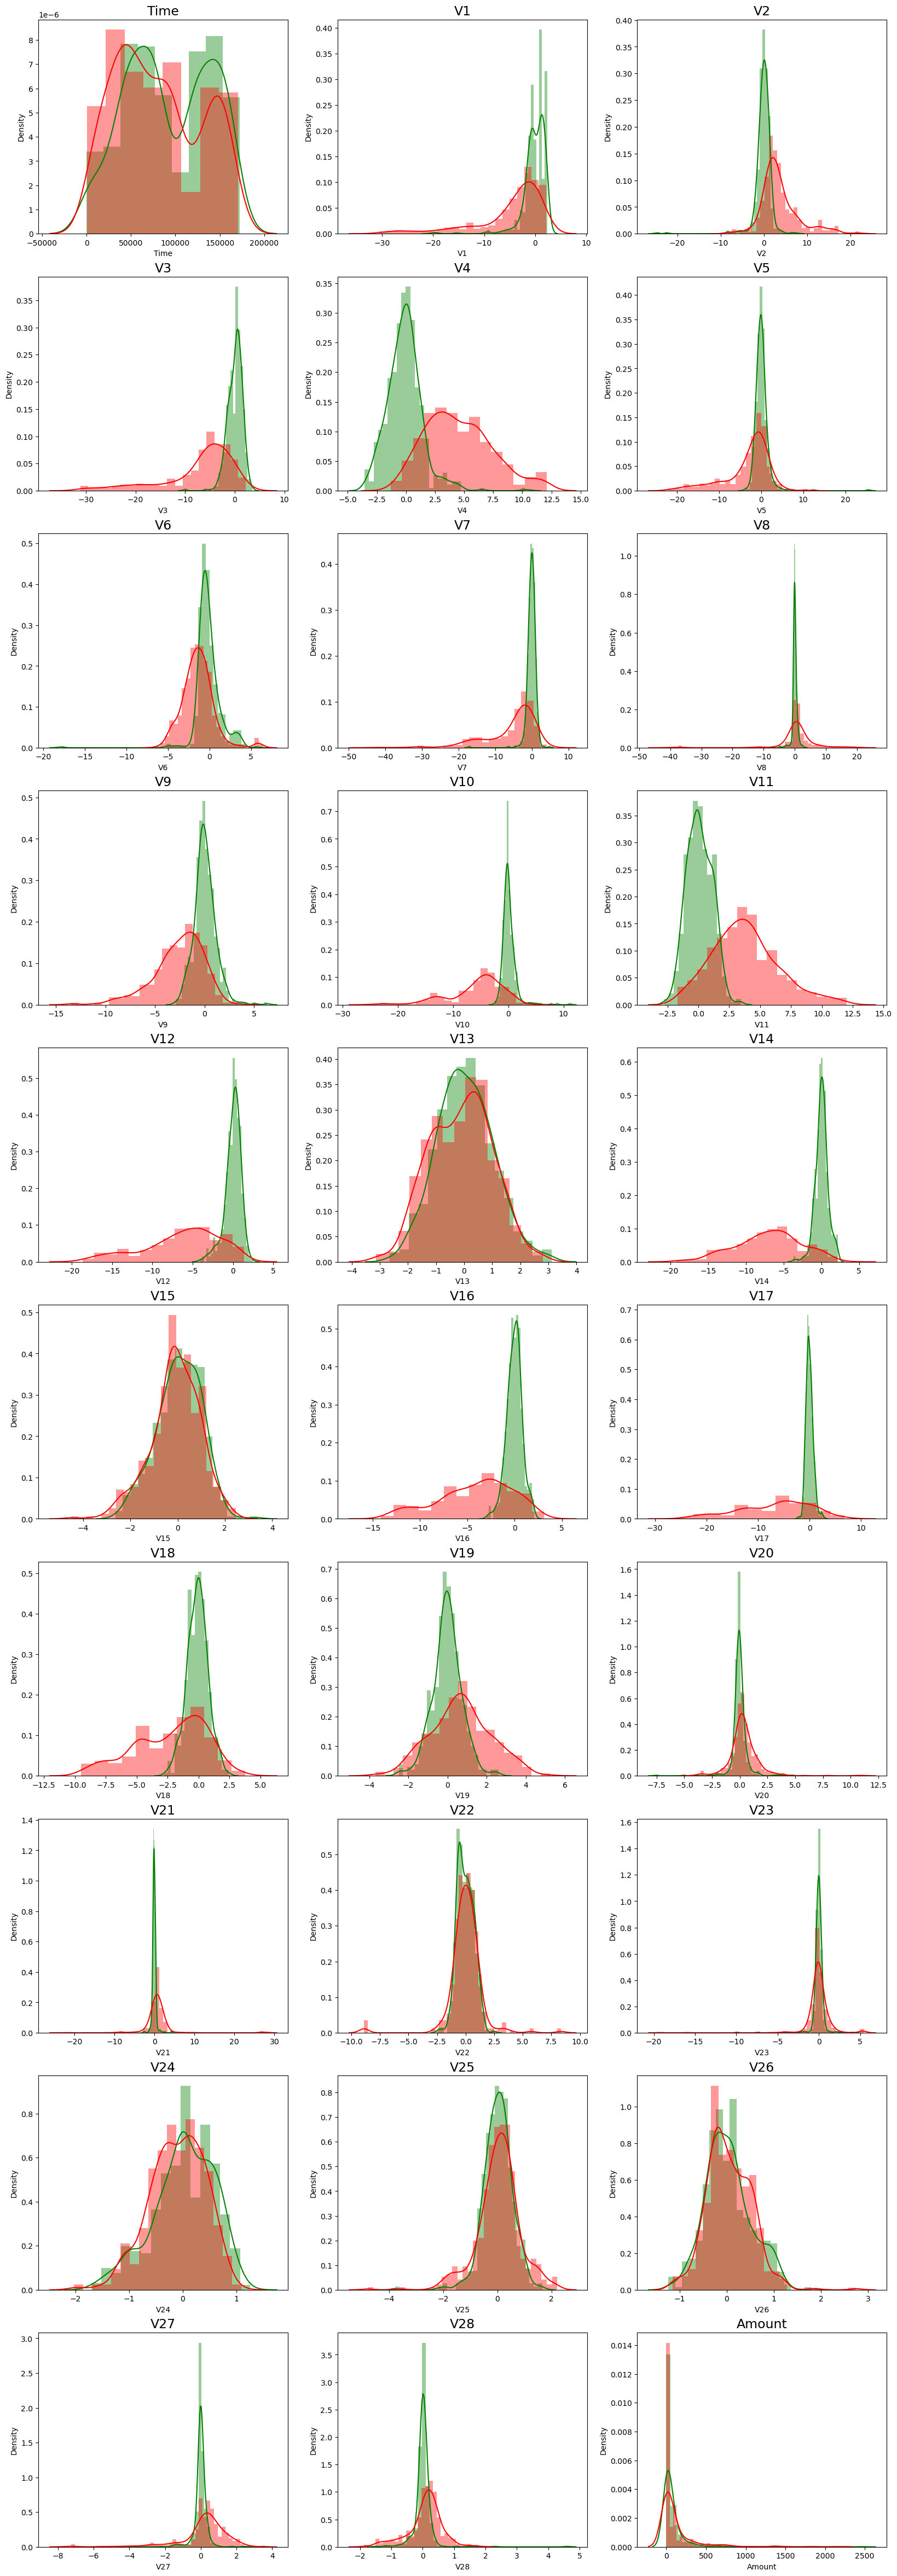

In [109]:
normal_rec=credit.Class == 0
fraud_rec=credit.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_rec], color='green')
    sns.distplot(X[col][fraud_rec], color='red')
    plt.title(col, fontsize=17)
plt.show()

In [110]:
#Model Training-logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
model = LogisticRegression()

In [113]:
#training the logistic regression model 
model.fit(X_train, Y_train)

LogisticRegression()

In [114]:
#Model Evaluation

In [115]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [116]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9453621346886912


In [117]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [118]:
print('Accuracy on testing data:',test_data_accuracy)

Accuracy on testing data: 0.9289340101522843


In [119]:
from sklearn.metrics import precision_score,recall_score, f1_score

In [120]:
precision_score(Y_test,X_test_prediction)

0.9375

In [121]:
recall_score(Y_test,X_test_prediction)

0.9183673469387755

In [122]:
f1_score(Y_test,X_test_prediction)

0.9278350515463918

In [133]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        99
           1       0.94      0.92      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [123]:
#Decision Tree Classifier

In [124]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [125]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [126]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9453621346886912


In [127]:
X_train_prediction=dt.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [128]:
print('Accuracy on testing data:',test_data_accuracy)

Accuracy on testing data: 0.9289340101522843


In [129]:
#confusion matrix

In [130]:
dt_resulte=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])


<Axes: >

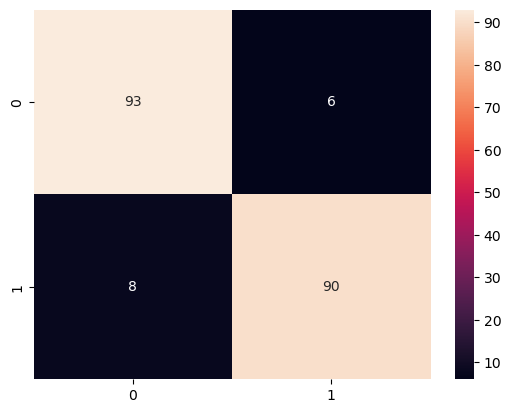

In [131]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True)

<Axes: ylabel='count'>

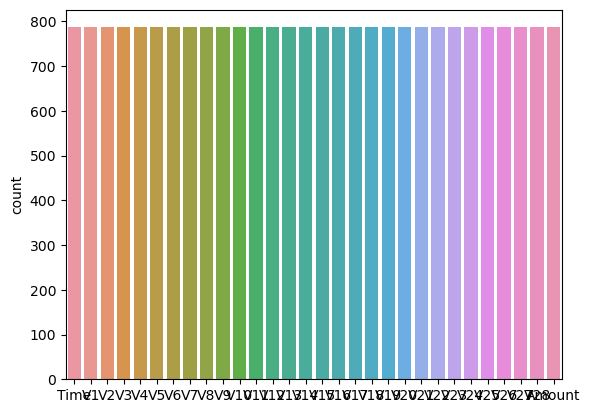

In [144]:
sns.countplot(X_train)

In [134]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
X_smote, Y_smote = over_sample.fit_resample(X_train, Y_train)

<Axes: ylabel='count'>

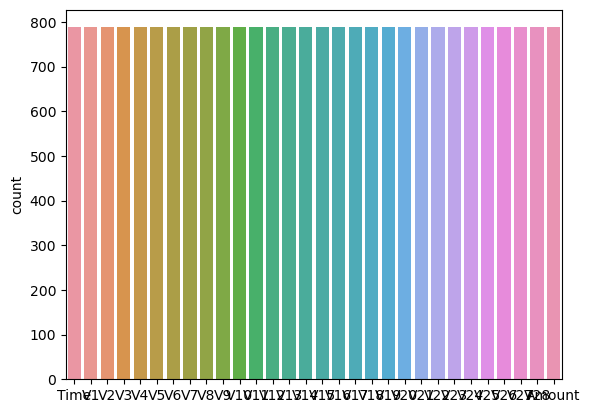

In [141]:
sns.countplot(X_smote)